## Observations and Insights

## Dependencies and starter code

In [1]:
# Matplotlib Homework By Mengye Wei
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
completed_data = pd.merge(mouse_metadata, study_results,on = "Mouse ID")
completed_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Make Regimens into groups, and find out their statistics values
regimen_group = completed_data.groupby("Drug Regimen")
regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
regimen_std = regimen_group["Tumor Volume (mm3)"].std()
regimen_sem = regimen_group["Tumor Volume (mm3)"].sem()
# Put all statistics values into d Data Frame and print it out
summary_stat = pd.DataFrame({"Mean":regimen_mean,
                            "Median":regimen_median,
                            "Variance":regimen_var,
                            "Standard Deviation":regimen_std,
                            "SEM":regimen_sem})
summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

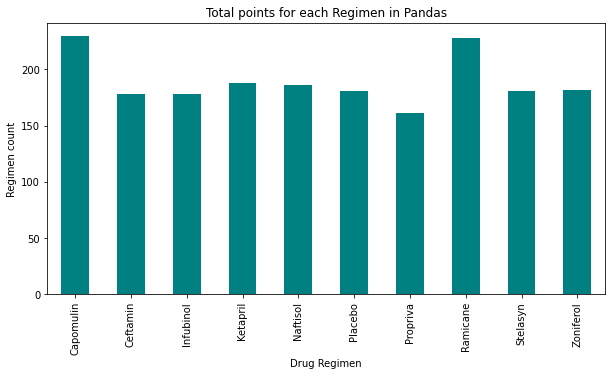

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_pandas = completed_data.groupby("Drug Regimen")
# count is the x_axis for the bar plot
count = regimen_pandas["Mouse ID"].count()
count.plot(kind="bar",figsize=(10,5),color="teal")
plt.title("Total points for each Regimen in Pandas")
plt.ylabel("Regimen count")
plt.savefig("images/regimen_pts_pandas.png")
plt.show()
plt.tight_layout()

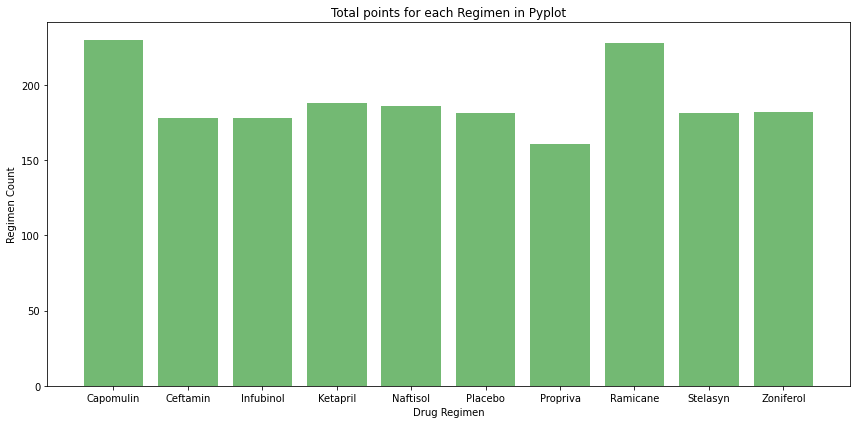

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# regimen_count = completed_data.groupby("Drug Regimen").count()["Mouse ID"].tolist()

# Make the count that used on pandas into a list
regimen_count = count.tolist()
# Get the name for each regimen and this are the tickers
regimen_pyplot = count.index.tolist()
# Set the range of x_axis
x_axis_regimen = np.arange(len(regimen_pyplot))
tick_locations = [r for r in x_axis_regimen]
plt.figure(figsize=(12,6))
plt.bar(x_axis_regimen,regimen_count,color="green",alpha=0.55,align="center")
plt.xticks(tick_locations,regimen_pyplot)
plt.title("Total points for each Regimen in Pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Count")
plt.tight_layout()
plt.savefig("images/regimen_pts_pyplot.png")
plt.show()

## Pie plots

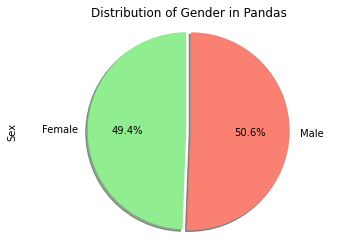

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Get the count for female and male on column "Sex"
gender_pandas = completed_data.groupby("Sex")
gender_count = gender_pandas["Sex"].count()
color = ["lightgreen","salmon"]
explode = (0, 0.05)
gender_count.plot(kind="pie",shadow=True,startangle=90,autopct="%1.1f%%",colors=color,explode=explode)
plt.title("Distribution of Gender in Pandas")
plt.axis("equal")
plt.savefig("images/gender_dis_pandas.png")
plt.show()

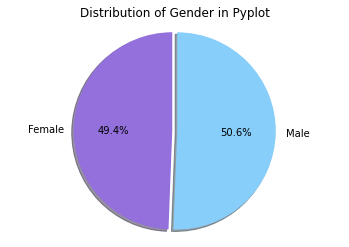

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_list = gender_count.index.tolist()
gender_count_list = gender_count.tolist()
colors = ["mediumpurple", "lightskyblue"]
explode = (0, 0.05)
plt.title("Distribution of Gender in Pyplot")
plt.pie(gender_count_list, explode=explode, labels=gender_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig("images/gender_dis_pyplot.png")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Using .isin to sort out the four of the most promising treatment regimens
best_regimes = completed_data[completed_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Then use sorting timepoint values from smallest to largest
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True) 
best_regimes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1391,q132,Infubinol,Female,1,30,0,45.000000,0
195,i738,Capomulin,Female,23,20,0,45.000000,0
205,a520,Ramicane,Male,13,21,0,45.000000,0
1370,p438,Ceftamin,Female,11,26,0,45.000000,0
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


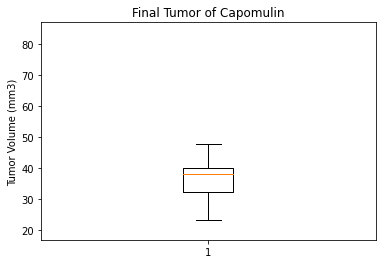

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [8]:
# Since we need to catch the  values for the final tumor volume, it needs to get values for each mouse
# at Timepoint 45. And .last() catch the highest(last) timepoint for each mouse ID
best_regimens_count = best_regimes.groupby(['Drug Regimen','Mouse ID']).last()['Tumor Volume (mm3)']
# Get only the Capomulin dates
capomulin = best_regimens_count["Capomulin"].reset_index()
capumulin_list = capomulin['Tumor Volume (mm3)']

# Plot the final tumor of Capomulin and set the same limit for all four regimes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor of Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_ylim(17,87)
ax1.boxplot(capumulin_list)
plt.savefig("images/capomulin_tumor.png")
plt.show()

# Print out the quartiles and boundary of the datas
# There is no potential outliers for Capomulin's tumor volumn
quartiles = capumulin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


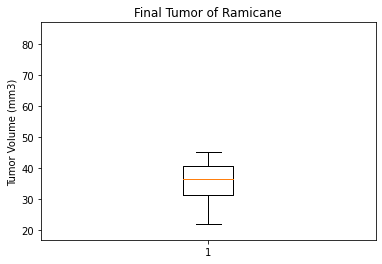

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [9]:
# Get only the Ramicane data from the top four regimens
ramicane = best_regimens_count["Ramicane"].reset_index()
ramicane_list = ramicane['Tumor Volume (mm3)']

# Plot the final tumor of Capomulin and set the same limit for all four regimes
fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor of Ramicane')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.set_ylim(17,87)
ax2.boxplot(ramicane_list)
plt.savefig("images/ramicane_tumor.png")
plt.show()

# Print out the quartiles and boundary of the datas
# There is no potential outliers for Ramicane's tumor volumn
quartiles = ramicane_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

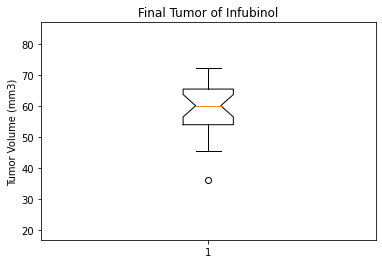

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [10]:
# Get only the Infubinol data from the top four regimens
infubinol = best_regimens_count["Infubinol"].reset_index()
infubinol_list = infubinol['Tumor Volume (mm3)']

# Plot the final tumor of Capomulin and set the same limit for all four regimes
fig3, ax3 = plt.subplots()
ax3.set_title('Final Tumor of Infubinol')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.set_ylim(17,87)
ax3.boxplot(infubinol_list,notch=True)
plt.savefig("images/infubinol_tumor.png")
plt.show()

# Print out the quartiles and boundary of the datas
# There is one potential outliers for Infubinol's tumor volumn
quartiles = infubinol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

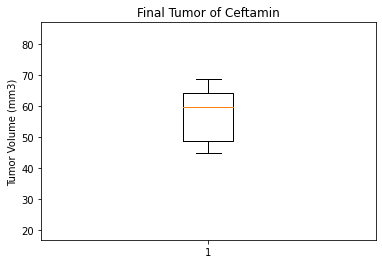

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [11]:
# Get only the Ceftamin data from the top four regimens
ceftamin = best_regimens_count["Ceftamin"].reset_index()
ceftamin_list = ceftamin['Tumor Volume (mm3)']

# Plot the final tumor of Capomulin and set the same limit for all four regimes
fig4, ax4 = plt.subplots()
ax4.set_title('Final Tumor of Ceftamin')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.set_ylim(17,87)
ax4.boxplot(ceftamin_list)
plt.savefig("images/ceftamin_tumor.png")
plt.show()

# Print out the quartiles and boundary of the datas
# There is no potential outliers for Ceftamin's tumor volumn
quartiles = ceftamin_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

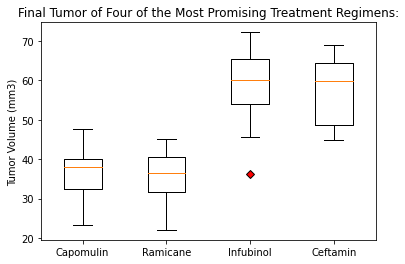

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Gathering all four regimens data into one list
four_regeimens = [capumulin_list,ramicane_list,infubinol_list,ceftamin_list]
# Create the label for x_axis
regeimens_label = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Put four box plots into one 
fig5,ax5 = plt.subplots()
ax5.set_title('Final Tumor of Four of the Most Promising Treatment Regimens:')
ax5.set_ylabel('Tumor Volume (mm3)')
ax4.set_ylim(17,87)
# Create the diamond shape with color red for the outliers
red_diamond = dict(markerfacecolor = 'r', marker = 'D')
ax5.boxplot(four_regeimens,flierprops = red_diamond, labels = regeimens_label)
plt.savefig("images/top_four_regimens.png")
plt.show()

## Line and scatter plots

These are the mouse ID that you can look for: 
Index(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957', 't565',
       'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246', 'j119', 'w150',
       'v923', 'g316', 's710', 'l509', 'r944', 'i557', 'r157'],
      dtype='object', name='Mouse ID')
What mouse ID are you looking for with Capomulin? b128


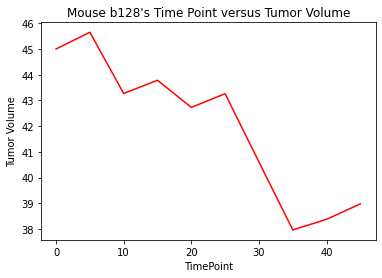

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Use .loc to locate all datas for Capomulin on Drug Regimen
capomulin_tp = completed_data.loc[completed_data["Drug Regimen"] == "Capomulin"]
capomulin_tp = capomulin_tp.set_index("Mouse ID")
# Print out all the Mouse ID that can enter 
id_name = capomulin_tp.index.unique()
print("These are the mouse ID that you can look for: ")
print(id_name)
print("=="*36)

# Ask the user to enter the mouse ID
mouse_id = input("What mouse ID are you looking for with Capomulin? ")
# Locate the data for Timepoint and tumor volume
timepoint = capomulin_tp.loc[mouse_id,["Timepoint"]]
mouse_tumor = capomulin_tp.loc[mouse_id,["Tumor Volume (mm3)"]]
# Plot the data
plt.plot(timepoint,mouse_tumor,color="red")
plt.title("Mouse " + mouse_id + "'s Time Point versus Tumor Volume")
plt.xlabel("TimePoint")
plt.ylabel("Tumor Volume")
plt.show()

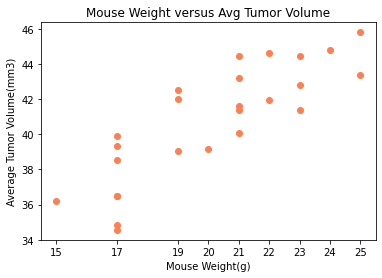

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Use groupby to group the data and find the average of tumor volume
avg_tumor = capomulin_tp.groupby(['Mouse ID','Weight (g)']).mean()["Tumor Volume (mm3)"]
avg_tumor = avg_tumor.reset_index()
# Remane the column for easy access 
avg_tumor = avg_tumor.rename(columns = {"Tumor Volume (mm3)":"avg_vol",
                                       "Weight (g)":"weight"})
# Weight is the x_axis, avg_volume is the y_axis
weight = avg_tumor.weight
avg_vol = avg_tumor.avg_vol
# Plot the scatter plot use pyplot
plt.scatter(weight,avg_vol,color ="coral")
plt.title("Mouse Weight versus Avg Tumor Volume")
# Tickers for x_axis is the weight for each mouse ID
plt.xticks(weight.unique())
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.savefig("images/weight_vs_vol.png")
plt.show()

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average 
# tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(weight,avg_vol)[0],2)
print(f"The correlation coefficient between mouse weight and tumor volumn is {correlation}")

The correlation coefficient between mouse weight and tumor volumn is 0.84


The r-squared is: 0.8419363424694718


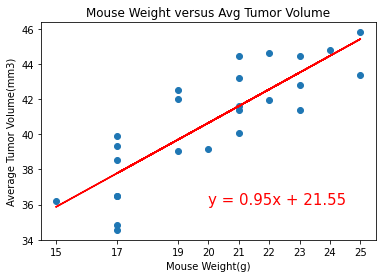

In [16]:
# Find the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Scatter plot and linear line
plt.scatter(weight,avg_vol)
plt.plot(weight,regress_values,"r-")
# Print the linear equation on the plot with annotate, start at the point(20,36)
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse Weight versus Avg Tumor Volume")
plt.xticks(weight.unique())
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
# Print the r_squared value, it shows how close between the data and linear regression
print(f"The r-squared is: {rvalue}")
plt.savefig("images/weight_vol_linear.png")
plt.show()